In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df1=df.drop(['RowNumber','CustomerId'],axis='columns')

In [5]:
df1.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df1.Gender.values

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [7]:
def unique_col_to_use(df1):
    for col in df1:
        if df1[col].dtype=='object':
            print(col,df1[col].unique())

In [8]:
unique_col_to_use(df1)

Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']


In [9]:
df1.replace({'Female':1,'Male':0},inplace=True)

In [10]:
unique_col_to_use(df1)

Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography ['France' 'Spain' 'Germany']


In [11]:
df1.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df2=pd.get_dummies(data=df1,columns=['Geography'])
df2

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,Johnstone,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,Liu,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,Sabbatini,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [13]:
df2.dtypes

Surname               object
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [14]:
df1.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df2.drop('Surname',axis='columns',inplace=True)


In [16]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [17]:
df2.Age=df2.Age/100
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,0.42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,0.41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,0.42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,0.39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,0.43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0.39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,0.35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,0.36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,0.42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [18]:
cols_to_scale=['Balance','EstimatedSalary','EstimatedSalary','CreditScore']
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [19]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6912,0.388,0,0.48,10,0.312137,3,1,1,0.518561,1,1,0,0
2137,1.000,1,0.38,1,0.425957,2,1,0,0.146621,0,1,0,0
7114,0.828,1,0.39,1,0.514426,2,1,1,0.939557,0,1,0,0
6922,0.656,1,0.60,2,0.000000,2,1,1,0.219071,0,1,0,0
3215,0.752,1,0.32,8,0.000000,2,0,0,0.925409,0,1,0,0


In [20]:
x=df2.drop('Exited',axis='columns')
y=df2.Exited

In [21]:
df2.shape

(10000, 13)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=5)
x_train.shape

<IPython.core.display.Javascript object>

(8000, 12)

In [25]:
model=keras.Sequential([
             keras.layers.Dense(12,input_shape=(12,),activation='relu'),
             keras.layers.Dense(10,activation='relu'),
             keras.layers.Dense(1,activation='sigmoid')                  
])
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7839
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7966
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7971
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8018
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8030
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8050
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8104
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4137 - accura

In [26]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8555


[0.3606780767440796, 0.8554999828338623]

In [27]:
yp=model.predict(x_test)
yp[:5]

array([[0.04510465],
       [0.07235545],
       [0.09001431],
       [0.08753073],
       [0.11284241]], dtype=float32)

In [28]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [29]:
y_pred=[]
for element in yp:
    if element >.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [31]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.86      0.84      2000



Text(69.0, 0.5, 'truth')

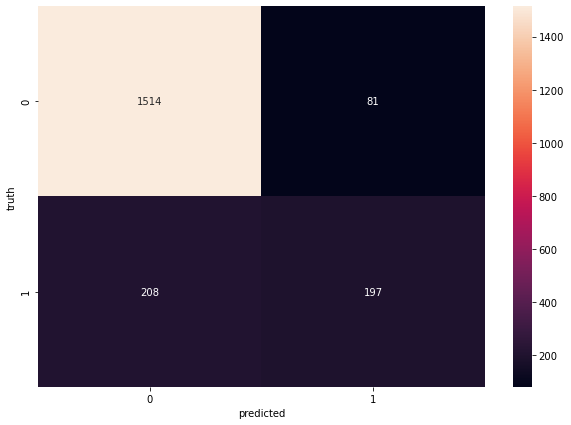

In [33]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')